In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
text = "After sleeping for four hours, he decided to sleep for another four!"


In [3]:
word_list = text.split(' ')
word_list

['After',
 'sleeping',
 'for',
 'four',
 'hours,',
 'he',
 'decided',
 'to',
 'sleep',
 'for',
 'another',
 'four!']

In [4]:
# Regex => Regular Expression | Compiler Design | Theory of computation
import re

In [5]:
sentence = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
sentence

'After sleeping for four hours he decided to sleep for another four '

In [6]:
stop_words = ['a','and', 'the', 'an', 'he', 'she', 'for']

In [7]:
for word in word_list:
    if word not in stop_words:
        print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes


In [8]:
refined_wlist = []
for word in word_list:
    if word not in stop_words:
        refined_wlist.append(word)
        
refined_wlist

['After',
 'sleeping',
 'four',
 'hours,',
 'decided',
 'to',
 'sleep',
 'another',
 'four!']

In [9]:
# stemming

In [10]:
stems = ['ing','s', 'ed']

In [11]:
for word in refined_wlist:
    for st in stems:
        if st in word:
            print(word)

sleeping
sleeping
hours,
decided
sleep


In [12]:
new_list = []
for word in refined_wlist:
    flag = 0
    for st in stems:
        if word.find(st)>0:
            new_list.append(word.replace(st,''))
            flag = 1
            break
    if flag == 0:
        new_list.append(word)
            
            

In [13]:
new_list 

['After', 'sleep', 'four', 'hour,', 'decid', 'to', 'sleep', 'another', 'four!']

In [14]:
world_list_l = []

for word in new_list:
    world_list_l.append(word.lower())

world_list_l

['after', 'sleep', 'four', 'hour,', 'decid', 'to', 'sleep', 'another', 'four!']

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cows"))

cow


In [16]:
tok = ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'bested']
for t in tok:
    print(lemmatizer.lemmatize(t))

The
striped
bat
are
hanging
on
their
foot
for
bested


In [17]:
sentences = ['it is a good movie', 'it is not a good movie', 'i did not like it']

In [18]:
unique_list = []
token_list = []
for sen in sentences:
    tokens = word_tokenize(sen)
    token_list.append(tokens)
    for tok in tokens:
        if tok not in unique_list:
              unique_list.append(tok)

In [19]:
print(unique_list, token_list)

['it', 'is', 'a', 'good', 'movie', 'not', 'i', 'did', 'like'] [['it', 'is', 'a', 'good', 'movie'], ['it', 'is', 'not', 'a', 'good', 'movie'], ['i', 'did', 'not', 'like', 'it']]


In [20]:
token_list

[['it', 'is', 'a', 'good', 'movie'],
 ['it', 'is', 'not', 'a', 'good', 'movie'],
 ['i', 'did', 'not', 'like', 'it']]

In [21]:
gram_1 = []

for token in token_list:
    # print(token)
    temp_list = []
    for un in unique_list:
          if un in token:
        # print("1")
            temp_list.append(1)
          else:
        # print("0")
            temp_list.append(0)
    print(temp_list)
    gram_1.append(temp_list)

[1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 1]


In [22]:
import numpy as np
np.array(gram_1)

array([[1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1]])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
text1 = ["it is a good movie"]
text2 = ["it is not a good movie"]
text3 = ["i did not like it"]

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(text1)

CountVectorizer()

In [25]:
print(vectorizer.vocabulary_)

{'it': 2, 'is': 1, 'good': 0, 'movie': 3}


In [26]:
newvector = vectorizer.transform(text2)

print(newvector.toarray())

[[1 1 1 1]]


In [27]:
newvector1 = vectorizer.transform(text3)
print(newvector1.toarray())

[[0 0 1 0]]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [29]:
text = ["it is a good movie","it is not a good movie","i did not like it"]

In [30]:
vectorizer.fit(text)

TfidfVectorizer()

In [31]:
print(vectorizer.idf_)

[1.69314718 1.28768207 1.28768207 1.         1.69314718 1.28768207
 1.28768207]


In [32]:
print(vectorizer.vocabulary_)

{'it': 3, 'is': 2, 'good': 1, 'movie': 5, 'not': 6, 'did': 0, 'like': 4}


In [33]:
vector = vectorizer.transform([text[2]])

In [34]:
print(vector.toarray())

[[0.5844829  0.         0.         0.34520502 0.5844829  0.
  0.44451431]]


In [35]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


In [36]:
import pandas as pd

In [37]:
vectorizer = TfidfVectorizer(max_df=0.5, ngram_range=(1,3),
                                 min_df=2,
                                 )
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names()
)


print(X.shape)
print(df)

(4, 6)
      first  first document  the first  the first document   this is  \
0  0.408248        0.408248   0.408248            0.408248  0.408248   
1  0.000000        0.000000   0.000000            0.000000  0.000000   
2  0.000000        0.000000   0.000000            0.000000  0.707107   
3  0.500000        0.500000   0.500000            0.500000  0.000000   

   this is the  
0     0.408248  
1     0.000000  
2     0.707107  
3     0.000000  


In [38]:
corpus = [
    'Data mining is one of the important research in the domain of Artificial Intelligence.',
    'Artificial Intelligence is a subject in Computer Science.',
    'Now a days, Artifical Intelligence is most commonly used in machine learning',
    'This particulary statement speaks about Aritifical Intelligence',
]

In [39]:
vectorizer = TfidfVectorizer(max_df=0.4, ngram_range=(1,3),
                                 min_df=1,
                                 )
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names()
)
print(df)
df.to_csv('sample.csv')

      about  about aritifical  about aritifical intelligence  aritifical  \
0  0.000000          0.000000                       0.000000    0.000000   
1  0.000000          0.000000                       0.000000    0.000000   
2  0.000000          0.000000                       0.000000    0.000000   
3  0.242536          0.242536                       0.242536    0.242536   

   aritifical intelligence  artifical  artifical intelligence  \
0                 0.000000   0.000000                0.000000   
1                 0.000000   0.000000                0.000000   
2                 0.000000   0.196116                0.196116   
3                 0.242536   0.000000                0.000000   

   artifical intelligence is  artificial intelligence is  commonly  ...  \
0                   0.000000                    0.000000  0.000000  ...   
1                   0.000000                    0.288675  0.000000  ...   
2                   0.196116                    0.000000  0.196116  

In [40]:
vectorizer = TfidfVectorizer(max_df=0.5, ngram_range=(2,2),
                                 min_df=1,
                                 )
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names()
)
print(df)
df.to_csv('sample1.csv')

   about aritifical  aritifical intelligence  artifical intelligence  \
0          0.000000                 0.000000                0.000000   
1          0.000000                 0.000000                0.000000   
2          0.000000                 0.000000                0.322386   
3          0.408248                 0.408248                0.000000   

   artificial intelligence  commonly used  computer science  data mining  \
0                 0.221920       0.000000          0.000000     0.281477   
1                 0.344315       0.000000          0.436719     0.000000   
2                 0.000000       0.322386          0.000000     0.000000   
3                 0.000000       0.000000          0.000000     0.000000   

   days artifical  domain of  important research  ...    one of  \
0        0.000000   0.281477            0.281477  ...  0.281477   
1        0.000000   0.000000            0.000000  ...  0.000000   
2        0.322386   0.000000            0.000000  ...  0.

In [41]:
data_train = pd.read_csv('data_train.csv', encoding='utf-8')
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)

In [42]:
class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [43]:
data

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to..."
11323,sadness,"Well , it's too bad that we like different kin..."
11324,neutral,It sure is .
11325,sadness,He ’ s got laid off again . I do feel sorry fo...


In [44]:
print(data.Emotion.value_counts())

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


In [45]:
data.Emotion.unique()

array(['neutral', 'sadness', 'fear', 'anger', 'joy'], dtype=object)

In [46]:
fear_df = data[data['Emotion']=='fear'].head(10)
fear_df

,Emotion,Text
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
10,fear,I had gone to the hospital for my research and...
17,fear,When I have to leave the baby in the carriage ...
20,fear,Infiltration in our lives. The illusion of ...
34,fear,When biking and I felt very bad (problems with...
35,fear,"Whenever I am alone in a dark room, walk alone..."
37,fear,When I got in jungle where there was a great n...
49,fear,When I was involved in a car accident last Nov...
53,fear,Saw a classmate knocked down by a motorcycle.


In [47]:
vectorizer = TfidfVectorizer(max_df=0.5, ngram_range=(1,1),
                                 min_df=1,
                                 )
X = vectorizer.fit_transform(fear_df.Text)
emotion_v = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names()
)
print(emotion_v)
emotion_v.to_csv('emotion_v.csv')

     accept  accident     after     alone        am        an       and  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.112720   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.112480   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.148407   
4  0.296792  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.392984   
6  0.000000  0.000000  0.000000  0.467241  0.155747  0.155747  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.142548  0.142548  0.000000  0.000000  0.000000  0.169296   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         as        at      baby  ...       was        we  whenever     where  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.161366  0

In [48]:
neutral_df = data[data['Emotion']=='neutral'].head(10)
neutral_df

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
8,neutral,Yes .
14,neutral,Perhaps we need to have more babies ! Tina ga...
15,neutral,Why ?
23,neutral,Over there .
25,neutral,"Me , too , I can ’ t stop scratching . They a..."
28,neutral,Why ?
50,neutral,Why ?
54,neutral,Make it 4
66,neutral,Jim !


In [49]:
vectorizer = TfidfVectorizer(max_df=0.5, ngram_range=(1,1),
                                 min_df=1,
                                 )
X = vectorizer.fit_transform(neutral_df.Text)
emotion_v1 = pd.DataFrame(
    X.todense(),
    columns=vectorizer.get_feature_names()
)
print(emotion_v1)

        are  babies  baby    better  birth   boy       can  everywhere  gave  \
0  0.521880    0.00  0.00  0.306955   0.00  0.00  0.000000    0.000000  0.00   
1  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
2  0.000000    0.25  0.25  0.000000   0.25  0.25  0.000000    0.000000  0.25   
3  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
4  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
5  0.259606    0.00  0.00  0.000000   0.00  0.00  0.305386    0.305386  0.00   
6  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
7  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
8  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   
9  0.000000    0.00  0.00  0.000000   0.00  0.00  0.000000    0.000000  0.00   

   have  ...      they     think  tina   to      tons       too    we  why  \
0  0.00  ...  0.000000  0.306955  0.00  0

In [50]:
bins=[0,50,75, np.inf]
num_words = data.Text.apply(lambda x : len(x.split()))

data['bins']=pd.cut(num_words, bins=[0,50,100,500,800, np.inf], labels=['0-50', '50-100', '300-500','500-800' ,'>800'])

word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

print(word_distribution)

      bins  counts
0     0-50   11086
1   50-100     232
2  300-500       9
3  500-800       0
4     >800       0


In [51]:
def clean_text(data):
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    data = word_tokenize(data)
    return data

In [52]:
texts = [' '.join(clean_text(text)) for text in data.Text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [53]:
print(len(texts), len(texts_train), len(texts_test))


11327 7934 3393


In [54]:
print(texts_train[0])

There are tons of other paintings that I think are better .


In [60]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 12087


In [58]:
MAX_LENGTH = 100
print(sequence_train[0])

[57, 51, 5933, 8, 132, 3296, 11, 1, 119, 51, 345]


In [61]:
X_train_pad = pad_sequences(sequence_train, maxlen = MAX_LENGTH )
X_test_pad = pad_sequences(sequence_test, maxlen = MAX_LENGTH )

In [62]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   57,   51, 5933,    8,  132, 3296,   11,    1,  119,   51,
        345])

In [63]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [64]:
print(texts_train[0])
print(sequence_train[0])
print(y_train[0])

There are tons of other paintings that I think are better .
[57, 51, 5933, 8, 132, 3296, 11, 1, 119, 51, 345]
4


In [66]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [125]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten, SimpleRNN, Bidirectional, GRU
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [68]:
num_class = len(class_names)

In [81]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)


predictions = Dense(num_class, activation='softmax')(x)


model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit([X_train_pad], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
#           shuffle=True, epochs=5, callbacks=[checkpointer])
batch_size = 128

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 100, 128)          1547264   
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                409632    
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 85        
Total params: 1,957,509
Trainable params: 1,957,509
Non-trainable params: 0
_________________________________________________

In [82]:
epochs = 50

hist = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_test_pad,y_test), callbacks=[checkpointer])

Epoch 1/50
62/62 [==============================] - 3s 41ms/step - loss: 1.4658 - acc: 0.3181 - val_loss: 1.3953 - val_acc: 0.3557

Epoch 00001: val_acc improved from -inf to 0.35573, saving model to weights-simple.hdf5
Epoch 2/50
62/62 [==============================] - 2s 34ms/step - loss: 1.2961 - acc: 0.4352 - val_loss: 1.2964 - val_acc: 0.4518

Epoch 00002: val_acc improved from 0.35573 to 0.45181, saving model to weights-simple.hdf5
Epoch 3/50
62/62 [==============================] - 2s 35ms/step - loss: 1.0053 - acc: 0.6409 - val_loss: 1.1640 - val_acc: 0.5308

Epoch 00003: val_acc improved from 0.45181 to 0.53080, saving model to weights-simple.hdf5
Epoch 4/50
62/62 [==============================] - 2s 35ms/step - loss: 0.6570 - acc: 0.7915 - val_loss: 1.1065 - val_acc: 0.5794

Epoch 00004: val_acc improved from 0.53080 to 0.57943, saving model to weights-simple.hdf5
Epoch 5/50
62/62 [==============================] - 2s 34ms/step - loss: 0.4196 - acc: 0.8771 - val_loss: 1.146

62/62 [==============================] - 2s 34ms/step - loss: 0.0178 - acc: 0.9945 - val_loss: 2.5097 - val_acc: 0.5812

Epoch 00044: val_acc did not improve from 0.61509
Epoch 45/50
62/62 [==============================] - 2s 34ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 2.5972 - val_acc: 0.5812

Epoch 00045: val_acc did not improve from 0.61509
Epoch 46/50
62/62 [==============================] - 2s 35ms/step - loss: 0.0181 - acc: 0.9946 - val_loss: 2.4712 - val_acc: 0.5903

Epoch 00046: val_acc did not improve from 0.61509
Epoch 47/50
62/62 [==============================] - 2s 35ms/step - loss: 0.0187 - acc: 0.9946 - val_loss: 2.5183 - val_acc: 0.5774

Epoch 00047: val_acc did not improve from 0.61509
Epoch 48/50
62/62 [==============================] - 2s 35ms/step - loss: 0.0192 - acc: 0.9940 - val_loss: 2.4965 - val_acc: 0.5753

Epoch 00048: val_acc did not improve from 0.61509
Epoch 49/50
62/62 [==============================] - 2s 34ms/step - loss: 0.0197 - acc: 0.9936 - 

In [87]:
inputs = np.random.random([32, 10, 18]).astype(np.float32)
simple_rnn = SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.

simple_rnn = SimpleRNN(
    4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)
print(whole_sequence_output, final_state)

tf.Tensor(
[[[-0.90063167  0.85521495 -0.05760406  0.30495885]
  [-0.95698446  0.62691027 -0.3584068  -0.16066553]
  [-0.99345523  0.65105623 -0.21151194  0.55910873]
  ...
  [-0.98187494  0.7984275   0.01104358  0.32442123]
  [-0.9785234   0.37673625 -0.22141895  0.17924654]
  [-0.95684475 -0.08964822 -0.35097322  0.10285882]]

 [[-0.41723436 -0.2153883  -0.5742436   0.60947996]
  [-0.8829261   0.43846482  0.04908592  0.77623385]
  [-0.87098306 -0.5438344   0.61280495 -0.01137532]
  ...
  [-0.8683994   0.26298055 -0.84763175 -0.5193502 ]
  [-0.95425886  0.69936806 -0.49914452  0.64391613]
  [-0.98565704 -0.09433898  0.31711137  0.14888963]]

 [[-0.96524066  0.6332015  -0.06899588  0.63496274]
  [-0.9267563   0.40864807 -0.5033205  -0.39682925]
  [-0.88588077  0.4912002  -0.833432    0.51437753]
  ...
  [-0.6352011  -0.67725945 -0.47238222  0.54220587]
  [-0.8598432  -0.10580781 -0.18256472  0.82565796]
  [-0.89973456 -0.59980524  0.60554844  0.24481075]]

 ...

 [[-0.8151661   0.21601

In [92]:
gru_output_size = 128
bidirectional = True
embed_num_dims = 300
embedding_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = MAX_LENGTH,
                         
                         trainable=False)
# Embedding Layer, LSTM or biLSTM, Dense, softmax
# embedding_layer = Embedding(vocab_size,
#                             128,
#                             input_length=MAX_LENGTH)(inputs)

model = Sequential()
model.add(embedding_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_class, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
# filepath="weights-simple.hdf5"
checkpoint_path = "shub_cp.ckpt"

# Create a callback that saves the model's weights
checkpointer = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit([X_train_pad], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
#           shuffle=True, epochs=5, callbacks=[checkpointer])
batch_size = 128
epochs = 3

hist = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_test_pad,y_test), callbacks=[checkpointer])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 300)          3626400   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               330240    
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 1285      
Total params: 3,957,925
Trainable params: 331,525
Non-trainable params: 3,626,400
_________________________________________________________________
Epoch 1/3
62/62 [==============================] - 90s 1s/step - loss: 1.4447 - acc: 0.3298 - val_loss: 1.4056 - val_acc: 0.3540

Epoch 00001: saving model to shub_cp.ckpt
Epoch 2/3
62/62 [==============================] - 99s 2s/step - loss: 1.3685 - acc: 0.3779 - val_loss: 1.3804 - val_acc: 0.3655

Epoch 00002: saving model to shub_cp.ckpt
Epoch 3/3
62/62 [=======

In [94]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = LSTM(64)(embedding_layer)

x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()

# filepath="weights-simple.hdf5"
checkpoint_path = "shub_lstm.ckpt"

# Create a callback that saves the model's weights
checkpointer = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit([X_train_pad], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
#           shuffle=True, epochs=5, callbacks=[checkpointer])
batch_size = 128
epochs = 20

hist = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_test_pad,y_test), callbacks=[checkpointer])

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 100, 128)          1547264   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 165       
Total params: 1,598,917
Trainable params: 1,598,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
62/62 [==============================] - 27s 361ms/step - loss: 1.4548 - acc: 0.3421 - val_loss: 1.3699 

In [95]:
model.save('shub_lstm.h5') #save
model.save_weights("shub_cp_final.ckpt")

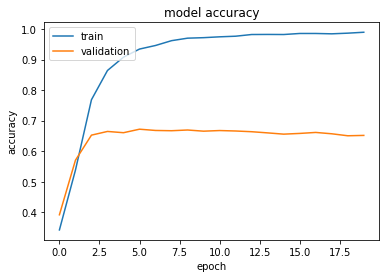

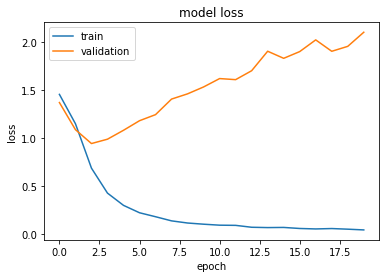

In [98]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [99]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [101]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [102]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

Accuracy: 65.16%

F1 Score: 65.16


In [103]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


F1 Score: 65.16


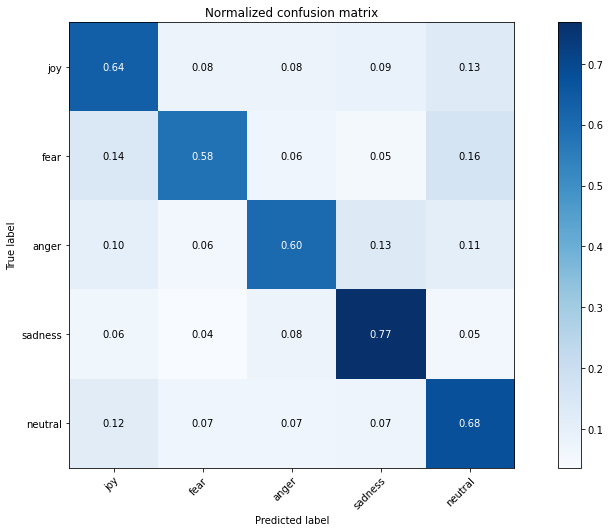

In [104]:
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [105]:
print('Message: {}\nPredicted: {}'.format(X_test[4], predictions[4]))

Message: My boyfriend didn't turn up after promising that he was coming.
Predicted: sadness


In [106]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: fear (0.10 seconds)


In [108]:
# from keras.models import 
from tensorflow.keras.models import load_model
# model.load_weights('amar_cp_final.ckpt', compile=False)
predictor = load_model('shub_lstm.h5')


message_list = [['delivery was hour late and my pizza was cold!'],
                ['They seemed anxious and hesitant about leaving , as if uncertain of which direction to take .'],
                ['Leading scorer Paul Wilkinson struck his 20th goal of the season against his former club but looked glum as he left the dressing room . ']]

for message in message_list:
    seq = tokenizer.texts_to_sequences(message)
    padded = pad_sequences(seq, maxlen=MAX_LENGTH)

    start_time = time.time()
    pred = predictor.predict(padded)

    print('Message: ' + str(message[0]))
    print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: delivery was hour late and my pizza was cold!
predicted: fear (0.97 seconds)
Message: They seemed anxious and hesitant about leaving , as if uncertain of which direction to take .
predicted: sadness (0.10 seconds)
Message: Leading scorer Paul Wilkinson struck his 20th goal of the season against his former club but looked glum as he left the dressing room . 
predicted: sadness (0.10 seconds)


In [109]:
from tensorflow.keras.models import load_model
# model.load_weights('amar_cp_final.ckpt', compile=False)
# predictor = load_model('/content/amarnath_lstm.h5')


message_list = [['I am happy today']]

for message in message_list:
    seq = tokenizer.texts_to_sequences(message)
    padded = pad_sequences(seq, maxlen=MAX_LENGTH)

    start_time = time.time()
    pred = model.predict(padded)

    print('Message: ' + str(message[0]))
    print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: I am happy today
predicted: joy (0.10 seconds)


In [113]:
path_to_file = keras.utils.data_utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1130496/1115394 [==============================] - 3s 2us/step


In [114]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [115]:
print(text[:252])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

A


In [116]:
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [123]:
from tensorflow.keras.layers.experimental import preprocessing
ids_from_chars = preprocessing.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [126]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [127]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [129]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [130]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [131]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [132]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1], dtype=int64)>

In [133]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [134]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [135]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

In [136]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [137]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [138]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [139]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [140]:
dataset = sequences.map(split_input_target)

In [141]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [142]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [143]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [144]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [145]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [146]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [147]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     multiple                  16896     
_________________________________________________________________
gru_1 (GRU)                  multiple                  3938304   
_________________________________________________________________
dense_29 (Dense)             multiple                  67650     
Total params: 4,022,850
Trainable params: 4,022,850
Non-trainable params: 0
_________________________________________________________________


In [148]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([32, 26,  1, 32, 10, 15, 57, 60, 26, 12, 17,  9, 23, 47, 16, 18, 39,
       21, 25, 16, 34, 22, 61, 17, 47, 65,  6, 61, 18, 26, 12, 19, 26,  0,
       16, 10, 35, 28,  2, 16, 64, 43, 24, 13, 39, 11,  5, 55, 33, 41, 57,
        7, 11, 56, 48, 17, 39, 54,  2, 28, 55, 19, 37, 44, 32, 28, 39, 40,
       39, 61, 38, 15, 32, 10, 38, 54, 52, 15, 54, 15, 15, 57, 54, 34, 22,
       53, 38, 59, 17,  2, 31, 16, 36,  7, 11, 62, 64, 52, 40, 55],
      dtype=int64)

In [149]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b"e a grief, so brief to part with thee: Farewell.\n\nCAPULET:\nThings have fall'n out, sir, so unluckily"

Next Char Predictions:
 b"SM\nS3BruM;D.JhCEZHLCUIvDhz'vEM;FM[UNK]C3VO CydK?Z:&pTbr,:qiDZo OpFXeSOZaZvYBS3YomBoBBroUInYtD RCW,:wymap"


In [150]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [151]:
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         4.1895623


In [152]:
model.compile(optimizer='adam', loss=loss)

In [154]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = 'training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [155]:
history = model.fit(dataset, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 462s 3s/step - loss: 2.7509
Epoch 2/20
172/172 [==============================] - 459s 3s/step - loss: 2.0027
Epoch 3/20
172/172 [==============================] - 462s 3s/step - loss: 1.7259
Epoch 4/20
172/172 [==============================] - 468s 3s/step - loss: 1.5605
Epoch 5/20
172/172 [==============================] - 469s 3s/step - loss: 1.4567
Epoch 6/20
172/172 [==============================] - 469s 3s/step - loss: 1.3871
Epoch 7/20
172/172 [==============================] - 451s 3s/step - loss: 1.3317
Epoch 8/20
150/172 [=========================>....] - ETA: 57s - loss: 1.2867 

KeyboardInterrupt: 